## PART 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from random import random


def create_dataset_00():
    Centers = [
        (0,0),
        (1,1),
        (2,1),
        (1,3)
    ]
    Centers = np.array(Centers)
    Points = []
    for center in Centers:
        var = np.array([[1,.5], [0,2]])
        Points.append(
            np.random.multivariate_normal(
                center,
                0.05*var,
                100
            )
        )
    Points = np.vstack(Points)
    return Points


def create_dataset_01():
    def line0(x):
        return (x, 10 - x ** 2 + (random() - 0.5))

    Points = []
    for _ in range(1000):
        x = 5 * (random() - 0.5)
        point = line0(x)
        Points.append(point)

    def line1(x):
        return (x, 5 * random() + ((x) * (x - 8)) + 5)

    for _ in range(1000):
        x = 5 * (random() + .1)
        point = line1(x)
        Points.append(point)

    Points = np.array(Points)
    return np.vstack(
        [
            Points,
            np.random.multivariate_normal((5, 5), [[1, 0], [0, 1]], 100)
        ])

In [3]:
Points = create_dataset_00()

/Users/shensheng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: covariance is not symmetric positive-semidefinite.


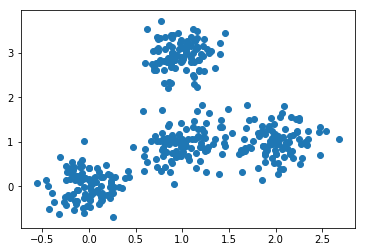

In [4]:
plt.scatter(Points[:,0], Points[:,1])
plt.show()

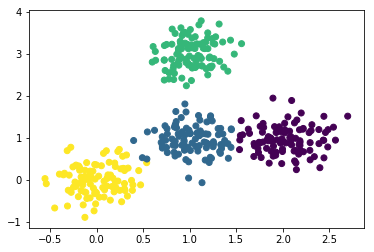

In [8]:
from sklearn.cluster import KMeans, DBSCAN
kmeans_model = KMeans(n_clusters=4)
y_pred = kmeans_model.fit_predict(Points)

plt.scatter(Points[:, 0], Points[:, 1], c=y_pred)
plt.show()

Estimated number of clusters: 3
Estimated number of noise points: 8


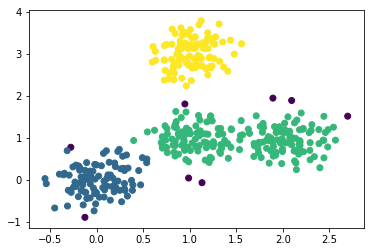

In [19]:
dbs_model = DBSCAN(eps=0.4, min_samples=30).fit(Points)

core_samples_mask = np.zeros_like(dbs_model.labels_, dtype=bool)
core_samples_mask[dbs_model.core_sample_indices_] = True
labels = dbs_model.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

plt.scatter(Points[:, 0], Points[:, 1], c=dbs_model.labels_)
plt.show()


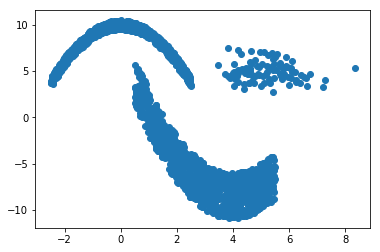

In [6]:
Points2 = Pointscreate_dataset_00()
plt.scatter(Points2[:,0], Points2[:,1])
plt.show()

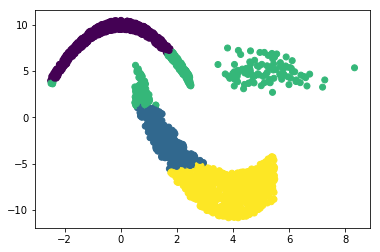

In [21]:
kmeans_model2 = KMeans(n_clusters=4)
y_pred2 = kmeans_model2.fit_predict(Points2)

plt.scatter(Points2[:, 0], Points2[:, 1], c=y_pred2)
plt.show()

Estimated number of clusters: 3
Estimated number of noise points: 7


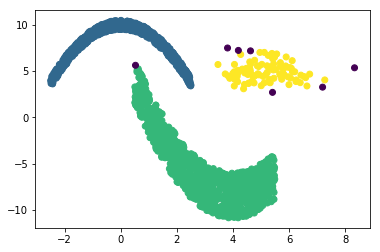

In [30]:
dbs_model2 = DBSCAN(eps=1, min_samples=20).fit(Points2)

core_samples_mask = np.zeros_like(dbs_model2.labels_, dtype=bool)
core_samples_mask[dbs_model2.core_sample_indices_] = True
labels = dbs_model2.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

plt.scatter(Points2[:, 0], Points2[:, 1], c=dbs_model2.labels_)
plt.show()


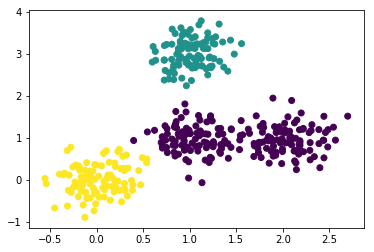

In [39]:
from sklearn.cluster import AgglomerativeClustering
agg_model = AgglomerativeClustering(linkage='ward',connectivity=None,n_clusters=3,affinity='euclidean')
#(n_clusters=2, affinity=’euclidean’, memory=None, connectivity=None, compute_full_tree=’auto’, linkage=’ward’, pooling_func=’deprecated’, distance_threshold=None)
agg_pred = agg_model.fit_predict(Points)
plt.scatter(Points[:, 0], Points[:, 1], c=agg_pred)
plt.show()

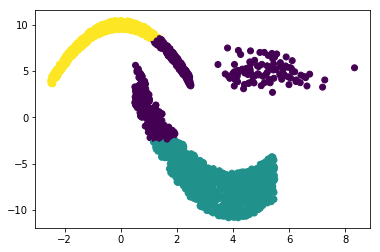

In [41]:
agg_model2 = AgglomerativeClustering(linkage='ward',connectivity=None,n_clusters=3,affinity='euclidean')
#(n_clusters=2, affinity=’euclidean’, memory=None, connectivity=None, compute_full_tree=’auto’, linkage=’ward’, pooling_func=’deprecated’, distance_threshold=None)
agg_pred2 = agg_model2.fit_predict(Points2)
plt.scatter(Points2[:, 0], Points2[:, 1], c=agg_pred2)
plt.show()

In [7]:
print(y_pred)

[2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 1 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3
 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [9]:
first = df_kmeans.loc[df_kmeans['label'] == 0,'points']
second = df_kmeans.loc[df_kmeans['label'] == 1,'points']
third = df_kmeans.loc[df_kmeans['label'] == 2,'points']
forth = df_kmeans.loc[df_kmeans['label'] == 3,'points']

In [10]:
df_kmeans.head()
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_kmeans, test_size = 0.1)

In [11]:
def sho(in_put):
    out_put=[]
    for x in in_put:
        out_put.append(x)
    out_put_1=np.array(out_put)
    return out_put_1
train_data = sho(train['points'])
train_label = sho(train['label']).reshape(-1, 1)
val_data = sho(test['points'])
val_label = sho(test['label']).reshape(-1, 1)

In [12]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="True"

In [13]:
import tensorflow as tf
from tensorflow import keras


In [14]:
model = keras.Sequential([
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(4, activation='softmax')
])

In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [16]:
model.fit(train_data, train_label, epochs=10, validation_data=(val_data, val_label))


Train on 360 samples, validate on 40 samples
Epoch 1/10
360/360 [==============================] - 1s 2ms/sample - loss: 1.4281 - acc: 0.2556 - val_loss: 1.3684 - val_acc: 0.4250
Epoch 2/10
360/360 [==============================] - 0s 95us/sample - loss: 1.3407 - acc: 0.3472 - val_loss: 1.2962 - val_acc: 0.6000
Epoch 3/10
360/360 [==============================] - 0s 89us/sample - loss: 1.2675 - acc: 0.6528 - val_loss: 1.2339 - val_acc: 0.7000
Epoch 4/10
360/360 [==============================] - 0s 83us/sample - loss: 1.2033 - acc: 0.6889 - val_loss: 1.1741 - val_acc: 0.7250
Epoch 5/10
360/360 [==============================] - 0s 71us/sample - loss: 1.1415 - acc: 0.7028 - val_loss: 1.1125 - val_acc: 0.7500
Epoch 6/10
360/360 [==============================] - 0s 72us/sample - loss: 1.0795 - acc: 0.7111 - val_loss: 1.0497 - val_acc: 0.7500
Epoch 7/10
360/360 [==============================] - 0s 74us/sample - loss: 1.0182 - acc: 0.7194 - val_loss: 0.9853 - val_acc: 0.7500
Epoch 8/10


In [24]:
test = np.array([[0.1,3]])
test

array([[0.1, 3. ]])

In [27]:
pred = model.predict(test)

In [28]:
np.argmax(pred[0])

0

###So the point is belongs to 0 class